In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from knn_classifier import knn_classifier
from tslearn.datasets import UCR_UEA_datasets
from transformers import AddTime, LeadLag  
import iisignature

In [3]:
data = UCR_UEA_datasets().list_multivariate_datasets()

In [53]:
k = 29
data[k]

'UWaveGestureLibrary'

In [54]:
x_train, y_train, x_test, y_test = UCR_UEA_datasets().load_dataset(data[k])

f = 0.1
x_train *= f
x_test *= f

In [55]:
x_train.shape

(120, 315, 3)

In [56]:
x_test.shape

(320, 315, 3)

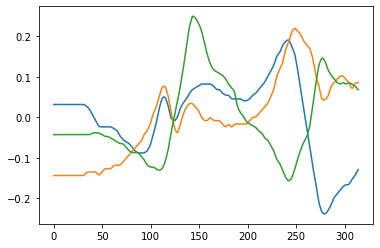

In [45]:
plt.plot(x_train[0])
plt.show()

In [46]:
# x_train = np.array(LeadLag().fit_transform(x_train))
# x_test = np.array(LeadLag().fit_transform(x_test))

# x_train = np.array(AddTime().fit_transform(x_train))
# x_test = np.array(AddTime().fit_transform(x_test))

In [47]:
label, proba, acc_score, conf_mat = knn_classifier(x_train, x_test, y_train, y_test, sub_rate=0.1, metric='dtw',
                                                   length=x_train.shape[1], replace=False, n_neighbours=1)

In [48]:
acc_score

0.871875

In [49]:
label, proba, acc_score, conf_mat = knn_classifier(x_train, x_test, y_train, y_test, sub_rate=0.1, metric='sig',
                                                   length=x_train.shape[1], replace=False, n_neighbours=1, n=0)

In [50]:
acc_score

0.75

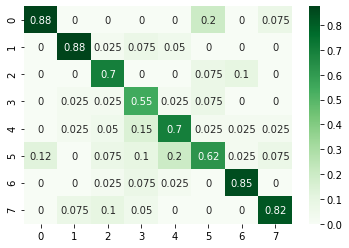

In [51]:
sns.heatmap(conf_mat, cmap="Greens", annot=True)
plt.show()